Bibliotecas utilizadas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

1.  Juntar todas as imagens em uma única
    * Converti todas as imagems em arrays
    * Redimensinei para ficarem do mesmo tamanho 
    * Juntei as imagens em uma única

In [ ]:
img1 = np.array(Image.open("P1.png").convert('RGB'))
img2 = np.array(Image.open("P2.png").convert('RGB'))
img3 = np.array(Image.open("P3.jpg").convert('RGB'))
img4 = np.array(Image.open("P4.png").convert('RGB'))

juntar_imagem = np.zeros((200, 400, 3), dtype=np.uint8)
#combina as imagens, a imagem 1 fica de 0 - 200 e a imagem 2 de 200 - 400, resultando em (img1, img2)
juntar_imagem[:, :200] = img1
juntar_imagem[:, 200:400] = img2

juntar_imagem2 = np.zeros((200, 400, 3), dtype=np.uint8)
juntar_imagem2[:, :200] = img3
juntar_imagem2[:, 200:400] = img4
#aqui junta verticalmente, a primeira fica em cima, e a segunda embaixo
pinguins_juntos = np.vstack((juntar_imagem, juntar_imagem2))

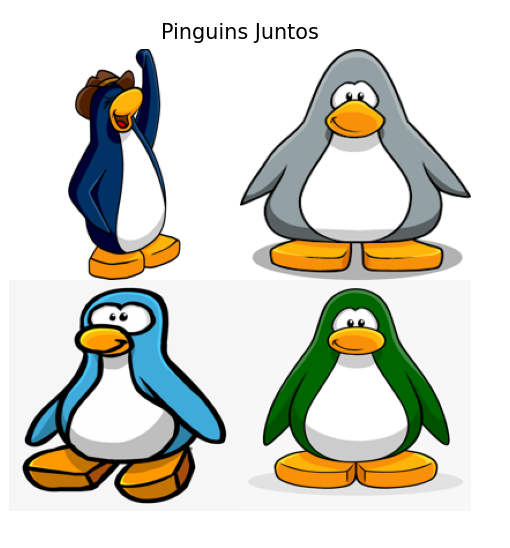

2.  Trocar as cores (mudar a cor dos pinguins para qualquer outra) 
    * Não entendi se é para trocar especificadamente só os pinguins, então troquei a imagem inteira, consequentemente os pinguins juntos
    * Para isto, eu apenas zerei os canais verde e azul do RGB.

In [ ]:
imagem_vermelha = pinguins_juntos.copy()
imagem_vermelha[:, :, 1] = 0  
imagem_vermelha[:, :, 2] = 0 

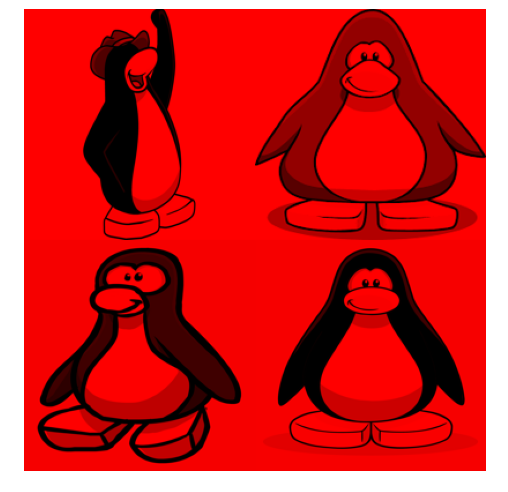

3.  Aplicar o espelhamento

In [ ]:
(l, c, p) = imagem_vermelha.shape
imagem_espelhada = np.zeros(shape=imagem_vermelha.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        imagem_espelhada[new_y, new_x] = imagem_vermelha[i, j]

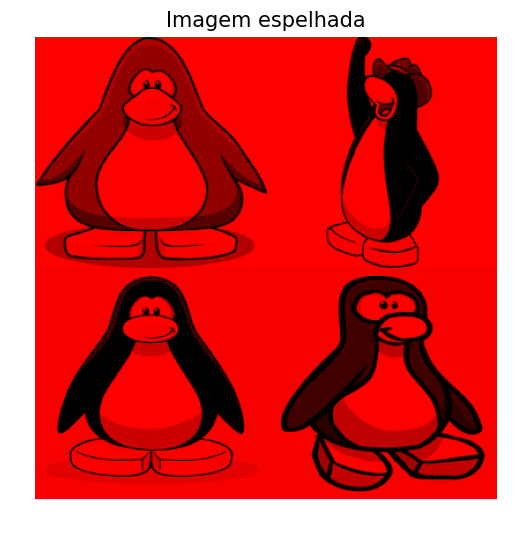

4.  Recortar seu pinguim favorito (descarte os outros, deixando apenas um na 
imagem).

In [ ]:

mask = np.zeros(shape=imagem_espelhada.shape, dtype=np.uint8) #a imagem inteira em 0
mask_height = imagem_espelhada.shape[0] // 2 #dividi a imagem em 2
mask_width = imagem_espelhada.shape[1] // 2 #dividi a imagem em 2
mask[-mask_height:, :mask_width, :] = 255 #seleciono o recorte inferior da altura, e o canto esquerdo da largura e igualo a 1

pinguin_favorito = imagem_espelhada & mask #aqui usa a lógica AND, onde for 1 ele deixa a imagem, onde for 0 ele continua como zero(preto)

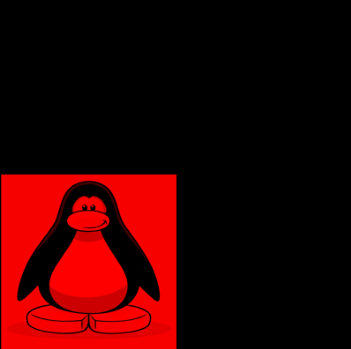

5.  Faça a analise do histograma em seu pinguim favorito e escolha um valor de 
threshold.  (Justifique a escolha do threshold)
    * A escolha do valor de treshold foi 50, pois é que tem a melhor visualização da imagem

In [ ]:
def threshold(img, thresh):
    out = img.copy()
    out[img > thresh] = 255
    out[img <= thresh] = 0
    return out


(l, c, p) = pinguin_favorito.shape

pinguin_favorito_gray = ((0.2126 * pinguin_favorito[:, :, 0]) + 
                         (0.7152 * pinguin_favorito[:, :, 1]) + 
                         (0.0722 * pinguin_favorito[:, :, 2])).astype(np.uint8)
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)
    plt.show()


show_histogram_gray(pinguin_favorito_gray)

threshold_value = 50  
pinguin_threshold = threshold(pinguin_favorito_gray, threshold_value)

show_histogram_gray(pinguin_threshold)

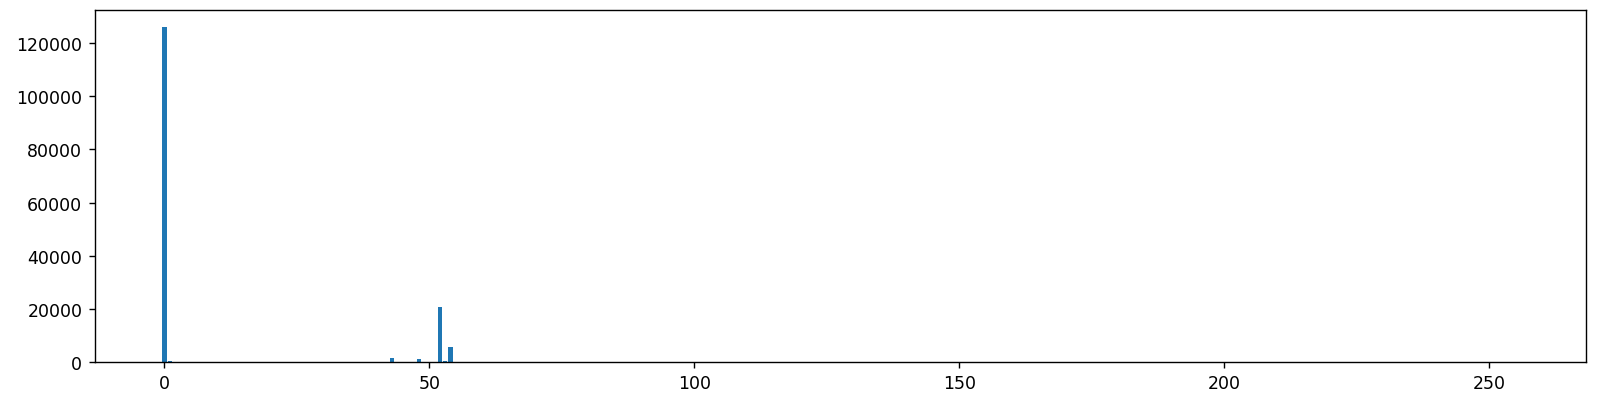

6. Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de
sua cor favorita (por exemplo: Azul)

In [ ]:
pinguin_thresholded = threshold(pinguin_favorito_gray, threshold_value)
def aplicar_threshold_e_cor(img, limite, cor):
    imagem_azul_ciano = np.stack([img] * 3, axis=-1)
    mascara = img < limite
    imagem_azul_ciano[mascara] = cor
    return imagem_azul_ciano

cor_ciano = [0, 255, 255]
valor_threshold = 50

pinguim_colorido = aplicar_threshold_e_cor(pinguin_thresholded, valor_threshold, cor_ciano)

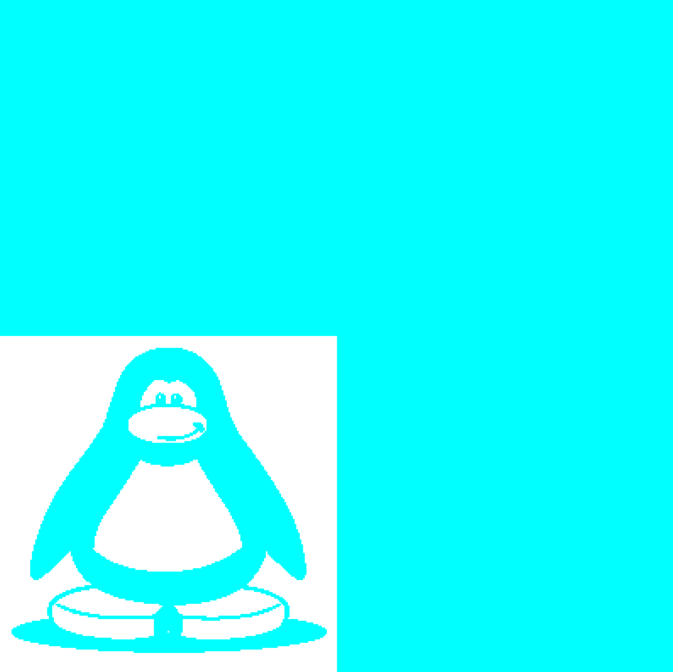